In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 10
%matplotlib inline

In [2]:
np.random.seed(420)
sigma = 1.
N_trials = 100
N_time = 500



## Theory: binomial motion


In [3]:
tau = 100.

def binomial_motion(N_time, N_trials, tau):
    time = np.arange(N_time)
    p = .5 * np.ones((N_time, N_trials)) #np.random.rand(N_time, N_trials)
    for i_time in time[1:]:
        p[i_time, :] = (1 - 1/tau)*p[i_time-1, :] + 1/tau *  np.random.rand(1, N_trials)
    return (time, p)

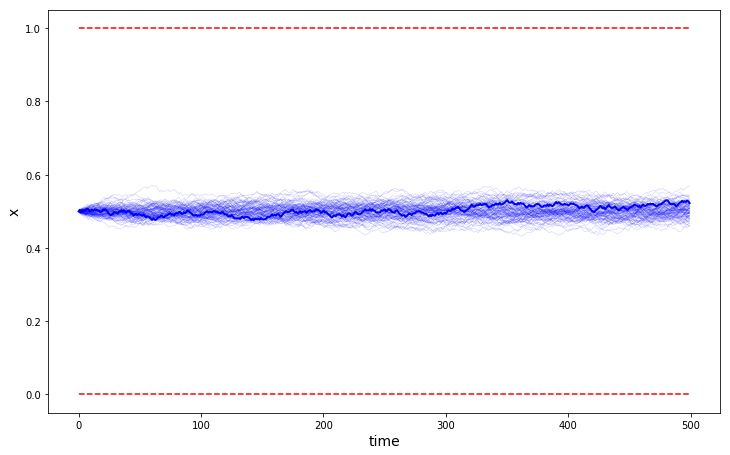

In [4]:
i_sample = np.random.randint(N_trials)
time, p = binomial_motion(N_time, N_trials, tau)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, p, c='b', lw=.5, alpha=.2)
_ = ax.plot(time, np.zeros_like(time), 'r--')
_ = ax.plot(time, np.ones_like(time), 'r--')
_ = ax.plot(time, p[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);

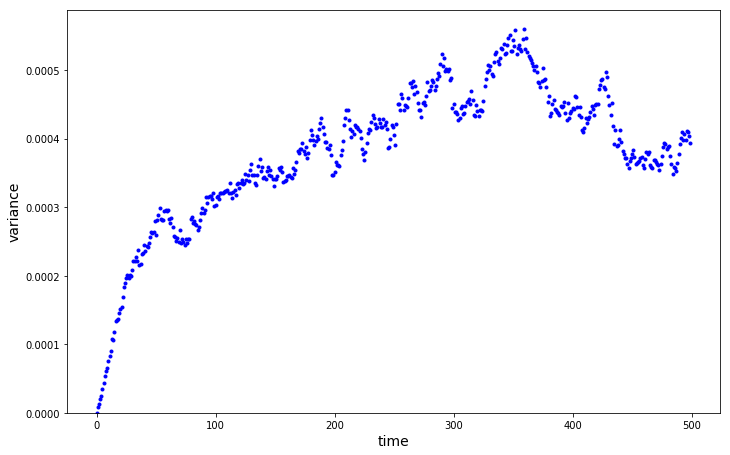

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, p.var(axis=1), 'b.')
#_ = ax.plot(time, sigma**2/(1-a**2)*np.ones_like(time), 'g-')
#_ = ax.plot(time, a**(2*time) + sigma**2/(1-a**2)*np.ones_like(time), 'r-')
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('variance', fontsize=14)
ax.set_ylim(0)
ax.set_xlabel('time', fontsize=14);

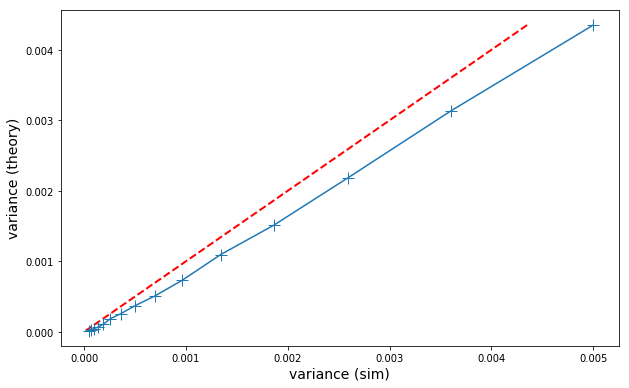

In [6]:
N_test = 15

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))

taus = tau*np.logspace(-1, 1, N_test)
var = np.zeros(N_test)
for i_test, tau_ in enumerate(taus):
    time, p = binomial_motion(N_time, N_trials, tau_)
    var[i_test] = np.var(p)

_ = ax.plot(var, var, 'r--', lw=2)
_ = ax.plot(.05/taus, var, '-', marker='+', ms=12)
ax.axis('tight')
ax.set_ylabel('variance (theory)', fontsize=14)
ax.set_xlabel('variance (sim)', fontsize=14);



## Theory: another binomial motion


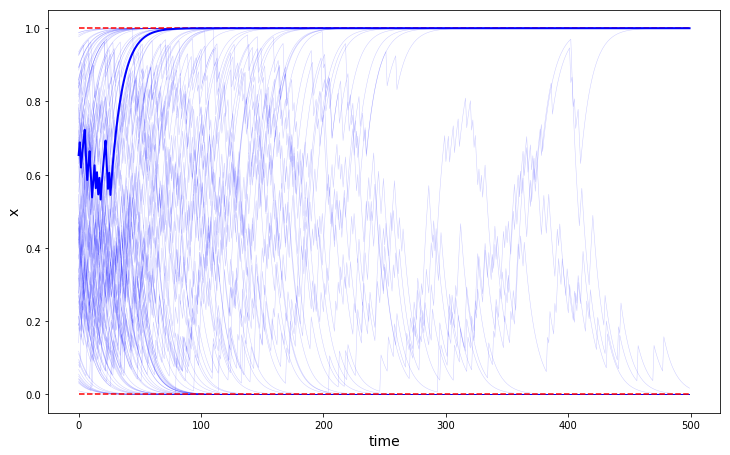

In [7]:
tau = 10.

def binomial_motion(N_time, N_trials, tau):
    time = np.arange(N_time)
    p = np.random.rand(N_time, N_trials)
    for i_time in time[1:]:
        p[i_time, :] = (1 - 1/tau)*p[i_time-1, :] + 1/tau *  (np.random.rand(1, N_trials) < p[i_time-1, :])
    return (time, p)

i_sample = np.random.randint(N_trials)
time, p = binomial_motion(N_time, N_trials, tau)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, p, c='b', lw=.5, alpha=.2)
_ = ax.plot(time, np.zeros_like(time), 'r--')
_ = ax.plot(time, np.ones_like(time), 'r--')
_ = ax.plot(time, p[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);



## Theory: switching motion


In [8]:
tau = 100.

def binomial_motion(N_time, N_trials, tau):
    time = np.arange(N_time)
    p = np.random.rand(N_time, N_trials)
    for i_time in time[1:]:
        switch = np.random.rand(1, N_trials) < 1/tau
        p[i_time, :] = (1 - switch)*p[i_time-1, :] + switch *  np.random.rand(1, N_trials)
    return (time, p)

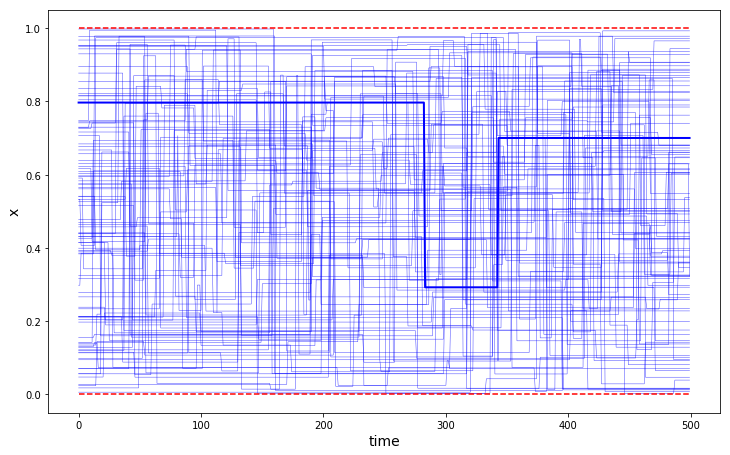

In [9]:
time, p = binomial_motion(N_time, N_trials, tau)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, p, c='b', lw=.5, alpha=.7)
_ = ax.plot(time, np.zeros_like(time), 'r--')
_ = ax.plot(time, np.ones_like(time), 'r--')
_ = ax.plot(time, p[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);

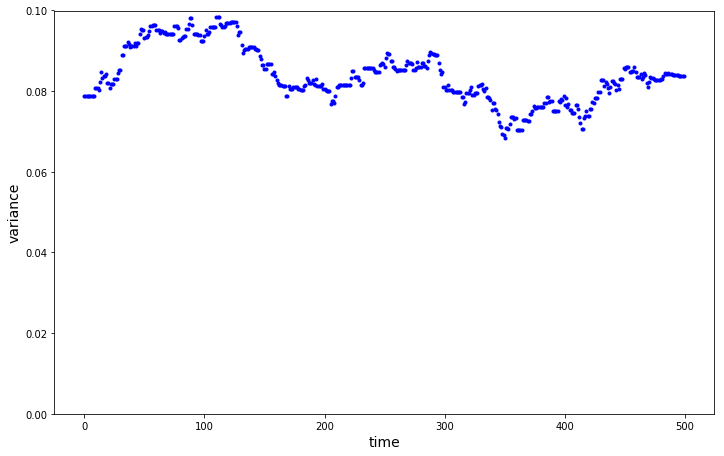

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, p.var(axis=1), 'b.')
#_ = ax.plot(time, sigma**2/(1-a**2)*np.ones_like(time), 'g-')
#_ = ax.plot(time, a**(2*time) + sigma**2/(1-a**2)*np.ones_like(time), 'r-')
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('variance', fontsize=14)
ax.set_ylim(0)
ax.set_xlabel('time', fontsize=14);

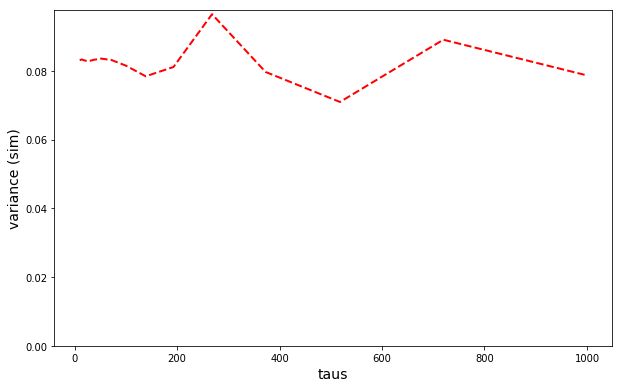

In [11]:
N_test = 15


fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))

taus = tau*np.logspace(-1, 1, N_test)
var = np.zeros(N_test)
for i_test, tau_ in enumerate(taus):
    time, p = binomial_motion(N_time, N_trials, tau_)
    var[i_test] = np.var(p)

_ = ax.plot(taus, var, 'r--', lw=2)
ax.axis('tight')
ax.set_xlabel('taus', fontsize=14)
ax.set_ylim(0)
ax.set_ylabel('variance (sim)', fontsize=14);




## Theory: stochastic switching motion


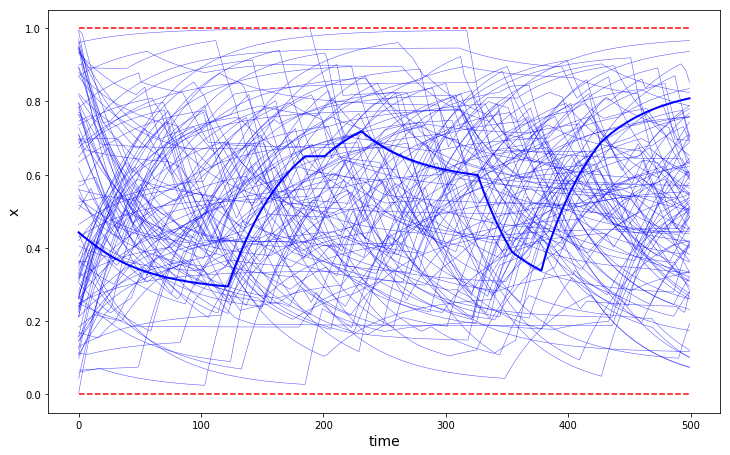

In [12]:
tau = 50.

def binomial_motion(N_time, N_trials, tau):
    time = np.arange(N_time)
    p = np.random.rand(N_time, N_trials)
    p_ = np.random.rand(1, N_trials)
    for i_time in time[1:]:
        switch = np.random.rand(1, N_trials) < 1/tau
        p_ = (1 - switch)*p_ + switch *  np.random.rand(1, N_trials)
        p[i_time, :] = (1 - 1/tau)*p[i_time-1, :] + 1/tau * p_
    return (time, p)

time, p = binomial_motion(N_time, N_trials, tau)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, p, c='b', lw=.5, alpha=.7)
_ = ax.plot(time, np.zeros_like(time), 'r--')
_ = ax.plot(time, np.ones_like(time), 'r--')
_ = ax.plot(time, p[:, i_sample], c='b', lw=2, alpha=1.)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);

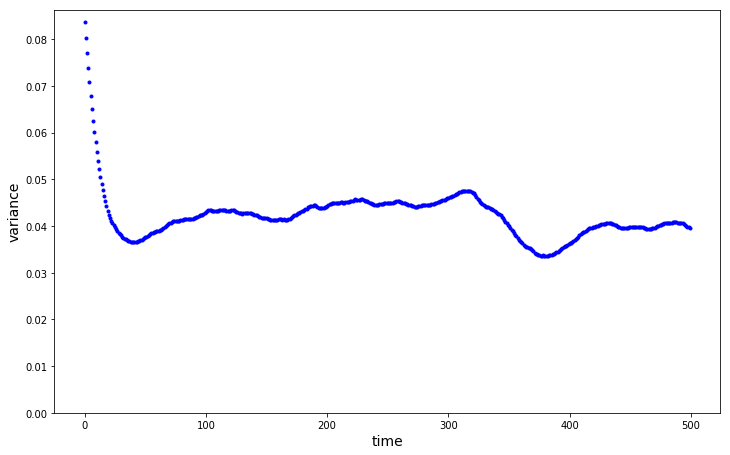

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, p.var(axis=1), 'b.')
#_ = ax.plot(time, sigma**2/(1-a**2)*np.ones_like(time), 'g-')
#_ = ax.plot(time, a**(2*time) + sigma**2/(1-a**2)*np.ones_like(time), 'r-')
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('variance', fontsize=14)
ax.set_ylim(0)
ax.set_xlabel('time', fontsize=14);

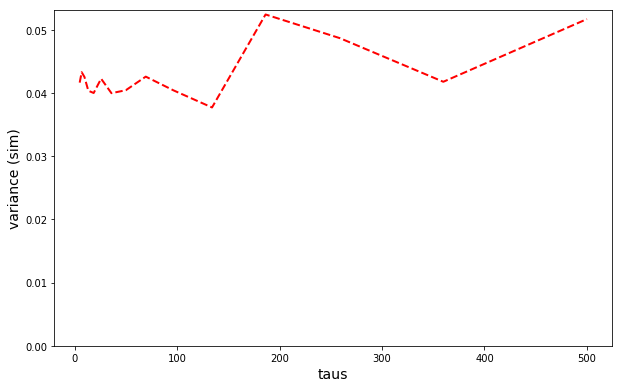

In [14]:
N_test = 15


fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))

taus = tau*np.logspace(-1, 1, N_test)
var = np.zeros(N_test)
for i_test, tau_ in enumerate(taus):
    time, p = binomial_motion(N_time, N_trials, tau_)
    var[i_test] = np.var(p)

_ = ax.plot(taus, var, 'r--', lw=2)
ax.axis('tight')
ax.set_xlabel('taus', fontsize=14)
ax.set_ylim(0)
ax.set_ylabel('variance (sim)', fontsize=14);
